In [23]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## CCLE BROAD 2019

In [5]:

DATA_DIR = "../data/ccle/ccle_broad_2019"
EXPR_FILE = f"{DATA_DIR}/data_mrna_seq_rpkm.txt"
META_EXPR_FILE = f"{DATA_DIR}/meta_mrna_seq_rpkm.txt"
META_STUDY_FILE = f"{DATA_DIR}/meta_study.txt"


In [6]:
# # 3. Load Data
# Read the expression matrix and metadata into pandas DataFrames.

# Expression data (genes x cell lines)
expr = pd.read_csv(EXPR_FILE, sep='\t', index_col=0)
# Metadata for expression samples
meta_expr = pd.read_csv(META_EXPR_FILE, sep='\t', index_col=0)
# Study metadata (cell line annotations)
meta_study = pd.read_csv(META_STUDY_FILE, sep='\t', index_col=0)


In [8]:

# Expression data (genes x cell lines)
expr = pd.read_csv(EXPR_FILE, sep='\t', index_col=0)
# Metadata for expression samples
meta_expr = pd.read_csv(META_EXPR_FILE, sep='\t', index_col=0)
# Study metadata (cell line annotations)
meta_study = pd.read_csv(META_STUDY_FILE, sep='\t', index_col=0)

In [10]:
expr

,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,UMUC16_URINARY_TRACT,UMUC4_URINARY_TRACT,UMUC5_URINARY_TRACT,UMUC6_URINARY_TRACT,UMUC7_URINARY_TRACT,UMUC9_URINARY_TRACT,UPCISCC152_UPPER_AERODIGESTIVE_TRACT,UW228_CENTRAL_NERVOUS_SYSTEM,Y79_AUTONOMIC_GANGLIA,YAMATO_SOFT_TISSUE
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.03755,0.00000,0.06507,0.00000,0.01378,0.01463,0.03085,0.00000,0.04487,...,0.00000,0.02977,0.02999,0.03532,0.03831,0.03236,0.00000,0.03799,0.02907,0.00000
WASH7P,12.63011,10.14155,6.20657,6.55835,7.61752,6.19356,4.62277,6.00767,4.70699,5.88294,...,6.42321,8.17443,7.75149,9.97036,8.17080,8.70551,15.23348,6.47732,8.45568,11.81688
MIR1302-11,0.04289,0.01037,0.16955,0.23364,0.08765,0.00000,0.00808,0.09373,0.02568,0.00826,...,0.12367,0.19183,0.10492,0.18537,0.07408,0.07747,0.07448,0.01049,0.39607,0.17586
FAM138A,0.00000,0.00869,0.22423,0.16558,0.00000,0.00637,0.00000,0.01427,0.00000,0.00000,...,0.01554,0.00459,0.01850,0.04903,0.01330,0.00000,0.02674,0.00879,0.26449,0.02266
OR4G4P,0.00000,0.00000,0.02886,0.03875,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00667,0.01182,0.01786,0.01052,0.01141,0.00642,0.00000,0.00000,0.00000,0.01459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND5,2393.80298,1960.96802,1896.28870,3522.37695,1178.93579,1345.42151,1943.89148,1413.57471,956.31226,1764.61121,...,1994.84985,704.86267,3936.23853,3560.20459,1245.38379,1452.41895,793.58710,757.41357,1218.16992,1320.84558
MT-ND6,1825.52332,2056.64697,2184.88647,4568.00195,1616.96484,1189.86279,1906.90405,1469.75574,1151.82861,1440.74084,...,1260.28455,398.13406,2419.38281,1791.45386,823.17352,996.53717,593.61139,472.01627,729.65912,564.16779
MT-TE,0.25386,0.00000,0.26410,0.00000,0.12970,0.00000,0.00000,0.25217,0.00000,0.00000,...,1.28093,0.40550,1.22567,1.58799,1.40931,0.08817,0.31489,0.15526,0.55439,0.00000


In [12]:
print(f"Expression matrix shape: {expr.shape}")
expr.head()



Expression matrix shape: (56318, 1156)


,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,UMUC16_URINARY_TRACT,UMUC4_URINARY_TRACT,UMUC5_URINARY_TRACT,UMUC6_URINARY_TRACT,UMUC7_URINARY_TRACT,UMUC9_URINARY_TRACT,UPCISCC152_UPPER_AERODIGESTIVE_TRACT,UW228_CENTRAL_NERVOUS_SYSTEM,Y79_AUTONOMIC_GANGLIA,YAMATO_SOFT_TISSUE
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.03755,0.00000,0.06507,0.00000,0.01378,0.01463,0.03085,0.00000,0.04487,...,0.00000,0.02977,0.02999,0.03532,0.03831,0.03236,0.00000,0.03799,0.02907,0.00000
WASH7P,12.63011,10.14155,6.20657,6.55835,7.61752,6.19356,4.62277,6.00767,4.70699,5.88294,...,6.42321,8.17443,7.75149,9.97036,8.17080,8.70551,15.23348,6.47732,8.45568,11.81688
MIR1302-11,0.04289,0.01037,0.16955,0.23364,0.08765,0.00000,0.00808,0.09373,0.02568,0.00826,...,0.12367,0.19183,0.10492,0.18537,0.07408,0.07747,0.07448,0.01049,0.39607,0.17586
FAM138A,0.00000,0.00869,0.22423,0.16558,0.00000,0.00637,0.00000,0.01427,0.00000,0.00000,...,0.01554,0.00459,0.01850,0.04903,0.01330,0.00000,0.02674,0.00879,0.26449,0.02266
OR4G4P,0.00000,0.00000,0.02886,0.03875,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00667,0.01182,0.01786,0.01052,0.01141,0.00642,0.00000,0.00000,0.00000,0.01459


In [18]:
# Count missing values per cell line
missing_per_line = expr.isna().sum(axis=0)
print(f"Missing values per cell line (max): {missing_per_line.max()}")

# Count missing values per gene
missing_per_gene = expr.isna().sum(axis=1)
print(f"Missing values per gene (max): {missing_per_gene.max()}")

print(expr.isnull().sum())

Missing values per cell line (max): 0
Missing values per gene (max): 0
22RV1_PROSTATE                          0
2313287_STOMACH                         0
253JBV_URINARY_TRACT                    0
253J_URINARY_TRACT                      0
42MGBA_CENTRAL_NERVOUS_SYSTEM           0
                                       ..
UMUC9_URINARY_TRACT                     0
UPCISCC152_UPPER_AERODIGESTIVE_TRACT    0
UW228_CENTRAL_NERVOUS_SYSTEM            0
Y79_AUTONOMIC_GANGLIA                   0
YAMATO_SOFT_TISSUE                      0
Length: 1156, dtype: int64


In [ ]:
#expr = expr.dropna()    # Dropping the missing values.
#expr.count()

In [ ]:
#print(expr.isnull().sum())   # After dropping the values


In [17]:
# Summary of expression values
expr.describe()

,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,UMUC16_URINARY_TRACT,UMUC4_URINARY_TRACT,UMUC5_URINARY_TRACT,UMUC6_URINARY_TRACT,UMUC7_URINARY_TRACT,UMUC9_URINARY_TRACT,UPCISCC152_UPPER_AERODIGESTIVE_TRACT,UW228_CENTRAL_NERVOUS_SYSTEM,Y79_AUTONOMIC_GANGLIA,YAMATO_SOFT_TISSUE
count,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000,...,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000,56318.000000
mean,6.525219,6.346689,7.430355,8.004810,6.237096,6.512393,7.262930,7.000763,6.986219,7.407553,...,6.318131,6.614045,7.357728,7.663145,5.865894,6.734670,6.906326,5.807987,6.483467,6.374805
std,98.528064,95.635560,98.702254,199.838428,64.915604,63.488560,109.131338,74.307211,90.711499,89.790384,...,80.396365,66.056950,229.558588,182.984943,55.474345,92.876538,64.454045,52.735538,79.799364,72.494387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.010505,0.000000,0.005805,0.004390,0.000000,0.000000,0.002190,0.000970,0.000000,0.001130,...,0.007055,0.005640,0.000000,0.002350,0.007520,0.000000,0.000000,0.000000,0.003665,0.000000
75%,1.010502,0.611255,0.812658,0.722170,0.561855,0.558120,0.602012,0.760707,0.511240,0.560342,...,0.627235,0.649377,0.419680,0.488025,0.720453,0.556330,0.714647,0.582638,0.641910,0.708110
max,15661.660160,15261.750980,11931.201170,35615.902340,8594.037110,7163.490720,11937.983400,9486.361330,11872.747070,10966.658200,...,11415.719730,6635.346190,33614.156250,20666.789060,5844.840820,12011.083010,4888.172850,4039.840330,8737.099610,9543.581050


<Axes: xlabel='2313287_STOMACH'>

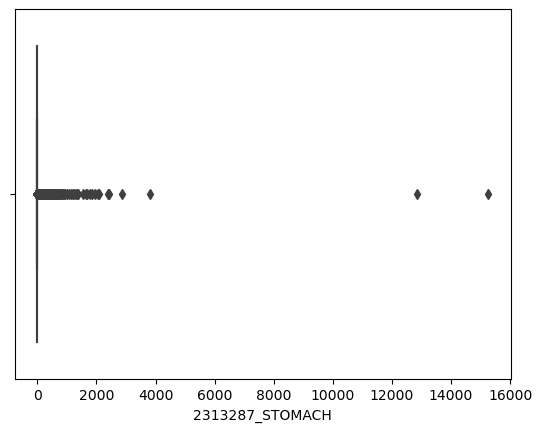

In [20]:
cnames = list(expr.columns)
cnames[1]
sns.boxplot(x=expr[cnames[1]])

<Axes: xlabel='2313287_STOMACH'>

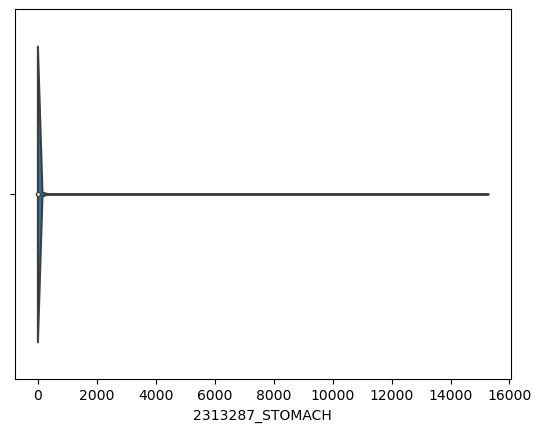

In [21]:
# Violin plots can be usefull. They are similar to a box plot, with the addition of a rotated kernel density plot on each side. So you can see the probability density of the data at different values. 
sns.violinplot(x=expr[cnames[1]])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

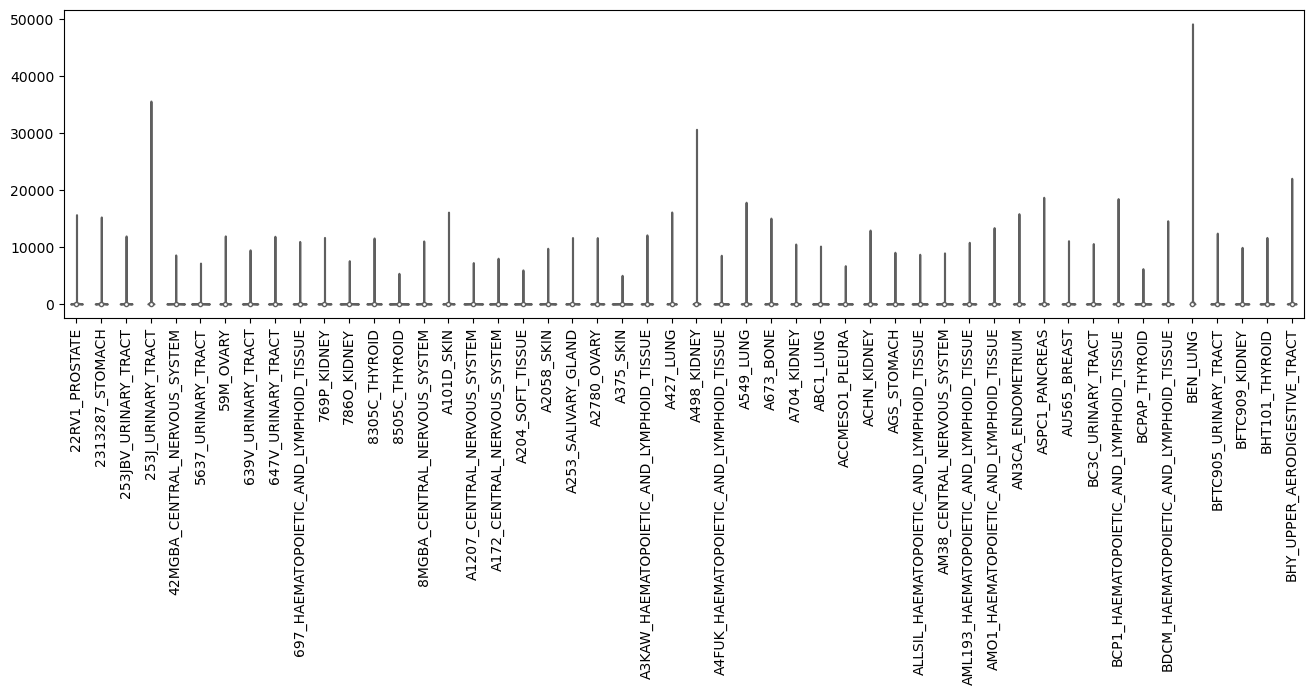

In [24]:
expr_small = expr.iloc[:, :50]
np.shape(expr_small)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=expr_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

In [25]:
Q1 = expr.quantile(0.25)
Q3 = expr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

22RV1_PROSTATE                          1.010502
2313287_STOMACH                         0.611255
253JBV_URINARY_TRACT                    0.812658
253J_URINARY_TRACT                      0.722170
42MGBA_CENTRAL_NERVOUS_SYSTEM           0.561855
                                          ...   
UMUC9_URINARY_TRACT                     0.556330
UPCISCC152_UPPER_AERODIGESTIVE_TRACT    0.714647
UW228_CENTRAL_NERVOUS_SYSTEM            0.582638
Y79_AUTONOMIC_GANGLIA                   0.641910
YAMATO_SOFT_TISSUE                      0.708110
Length: 1156, dtype: float64


Let's try to eliminate outliers using the quantile range.
Create a new dataset. It is always tidier in EDA. You can eliminate the old one later if you are happy with your new filtered or transformed dataset.

In [26]:
expr_noOut = expr[~((expr < (Q1 - 1.5 * IQR)) |(expr > (Q3 + 1.5 * IQR))).any(axis=1)]
expr_noOut.shape
expr_noOut.head(3)

,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,UMUC16_URINARY_TRACT,UMUC4_URINARY_TRACT,UMUC5_URINARY_TRACT,UMUC6_URINARY_TRACT,UMUC7_URINARY_TRACT,UMUC9_URINARY_TRACT,UPCISCC152_UPPER_AERODIGESTIVE_TRACT,UW228_CENTRAL_NERVOUS_SYSTEM,Y79_AUTONOMIC_GANGLIA,YAMATO_SOFT_TISSUE
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.0,0.03755,0.00000,0.06507,0.0,0.01378,0.01463,0.03085,0.0,0.04487,...,0.00000,0.02977,0.02999,0.03532,0.03831,0.03236,0.0,0.03799,0.02907,0.00000
OR4G4P,0.0,0.00000,0.02886,0.03875,0.0,0.00000,0.00000,0.00000,0.0,0.00000,...,0.00667,0.01182,0.01786,0.01052,0.01141,0.00642,0.0,0.00000,0.00000,0.01459
OR4G11P,0.0,0.00000,0.01939,0.03904,0.0,0.00000,0.00000,0.00000,0.0,0.00000,...,0.00000,0.00000,0.03599,0.01590,0.00575,0.00000,0.0,0.02279,0.01163,0.01469


<Axes: xlabel='2313287_STOMACH'>

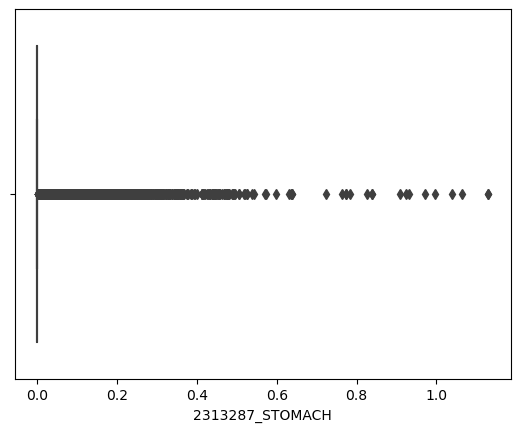

In [27]:
sns.boxplot(x=expr_noOut[cnames[1]])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

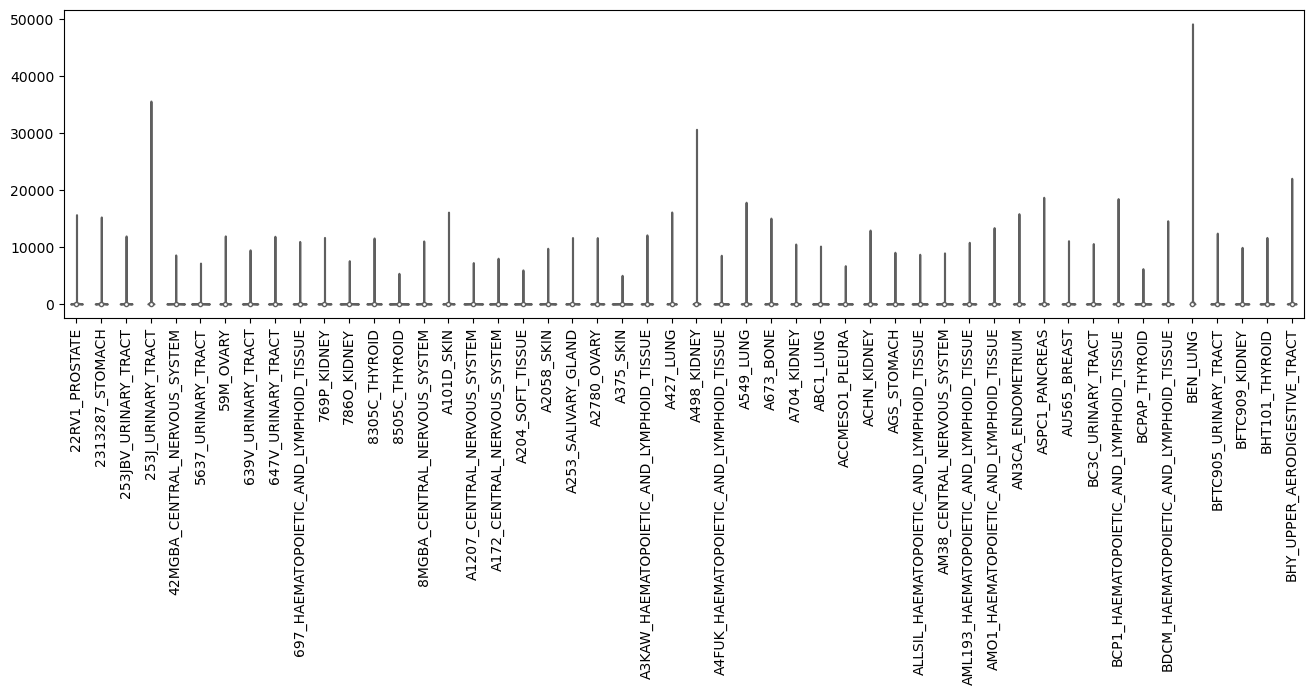

In [28]:
expr_noOut_small = expr.iloc[:, :50]
np.shape(expr_noOut_small)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=expr_noOut_small,palette="Set3",cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)

Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

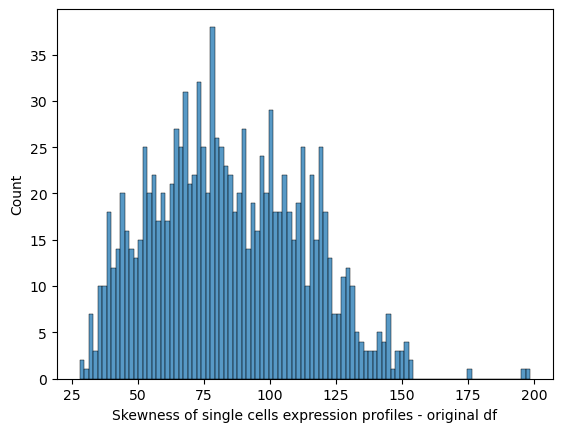

In [29]:
from scipy.stats import kurtosis, skew
colN = np.shape(expr)[1]
colN
df_skew_cells = []
for i in range(colN) :     
     v_df = expr[cnames[i]]
     df_skew_cells += [skew(v_df)]   
  #  df_skew_cells += [df[cnames[i]].skew()]
df_skew_cells
sns.histplot(df_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')

Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df')

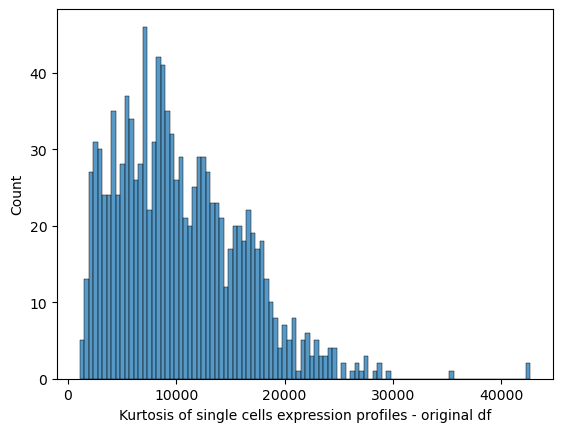

In [30]:
df_kurt_cells = []
for i in range(colN) :     
     v_df = expr[cnames[i]]
     df_kurt_cells += [kurtosis(v_df)]   
 #   df_kurt_cells += [df[cnames[i]].kurt()]
df_kurt_cells
sns.histplot(df_kurt_cells,bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df')

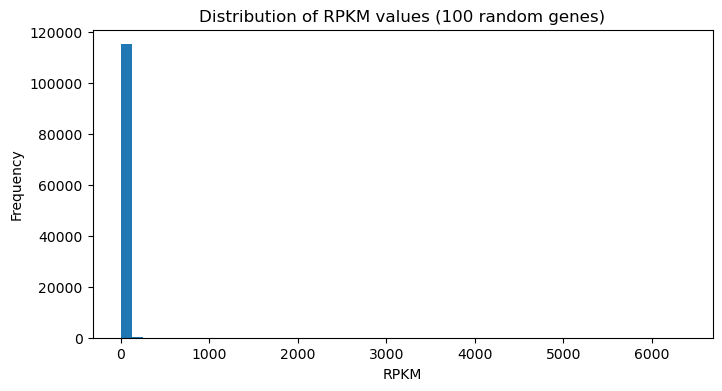

In [15]:
sampled = expr.sample(n=100, random_state=42)

# Melt the DataFrame to long format
melted = sampled.reset_index(drop=True).melt(value_name='RPKM')

plt.figure(figsize=(8, 4))
plt.hist(melted['RPKM'], bins=50)
plt.title('Distribution of RPKM values (100 random genes)')
plt.xlabel('RPKM')
plt.ylabel('Frequency')
plt.show()


In [31]:
xnorm = np.random.normal(0, 2, 10000000)   # create random values based on a normal distribution
xnorm 

print( "Excess kurtosis of normal distribution: ",  kurtosis(xnorm) )
print( "Skewness of normal distribution: ", skew(xnorm) )

Excess kurtosis of normal distribution:  0.0005188051742921473
Skewness of normal distribution:  0.0010527689439201173


## CELLINE CCLE BROAD 